# NEPAL GIS EDA Assignments

In [ ]:
#installing all the required libraries

In [1]:
pip install -r "requirements.txt"

Note: you may need to restart the kernel to use updated packages.


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:

import rasterio
import rasterio.plot
import numpy as np
import seaborn as sns
from rasterio.mask import mask
import fiona


In [4]:
# Path of the shape file
path = "datas/vector/Shape_Data/local_unit.shp"
# Loading the shape file
gdf = gpd.read_file(path)

In [5]:
gdf

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."
...,...,...,...,...,...,...
772,4,NAWALPARASI_E,Chitawan National Park,National Park,Gandaki,"POLYGON ((84.32537 27.68957, 84.32562 27.6894,..."
773,5,RUKUM_E,Bhume,Gaunpalika,5,"POLYGON ((82.65382 28.65759, 82.65428 28.65724..."
774,5,RUKUM_E,Putha Uttarganga,Gaunpalika,5,"POLYGON ((82.76718 28.80407, 82.76748 28.80383..."
775,5,RUKUM_E,Sisne,Gaunpalika,5,"POLYGON ((82.67327 28.85214, 82.67373 28.85205..."


In [6]:
# Checking the basic informations
print("Head:: \n" , gdf.head())
print("\nCRS:: \n" , gdf.crs)
print("\nGeometry:: \n", gdf.geometry)

Head:: 
    STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...  

CRS:: 
 GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHEROID["Everest 1830 (1937 Adjustment)",6377276.345,300.8017,AUTHORITY["EPSG","7015"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]

Geometry:: 
 0 

# Pre Data Processing


In [7]:
# Checking the quality of data
print(gdf.isnull().sum()) # Counting the missing values in each columns

STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64


In [8]:
print(gdf.describe())  # Numeric columns summary

       STATE_CODE
count  777.000000
mean     3.651223
std      2.000799
min      1.000000
25%      2.000000
50%      3.000000
75%      5.000000
max      7.000000


In [9]:
print(gdf["STATE_CODE"].value_counts().sort_index())

STATE_CODE
1    139
2    140
3    124
4     89
5    113
6     79
7     93
Name: count, dtype: int64


# Visualization

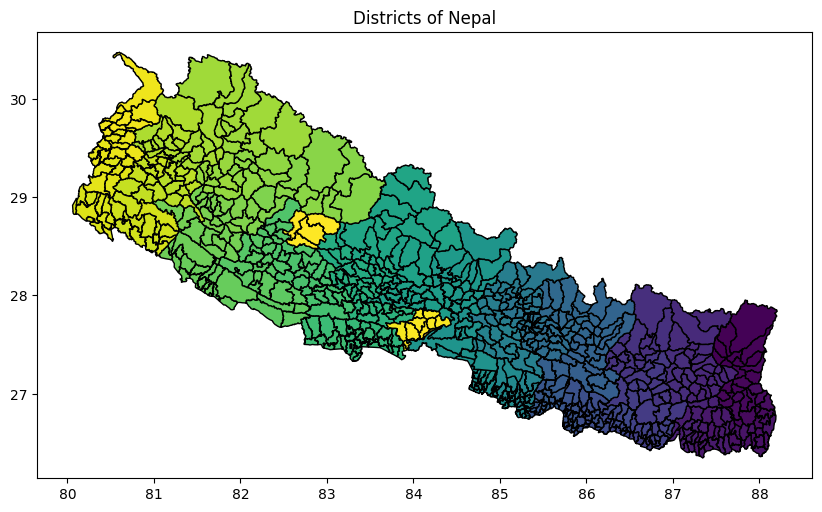

In [10]:
# plotting the GIS data of Nepal
gdf.plot(figsize=(10, 6), cmap="viridis", edgecolor="black")
plt.title("Districts of Nepal")
plt.show()

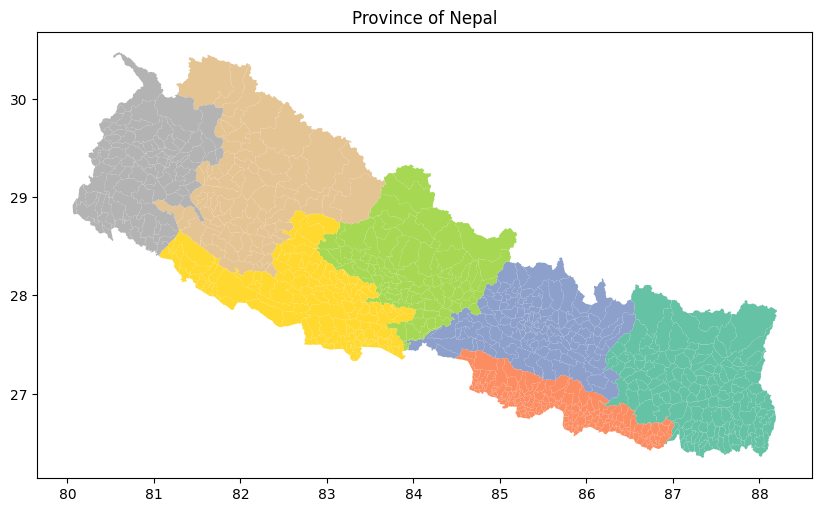

In [11]:
# Plot by State Code
gdf.plot(column="STATE_CODE", cmap="Set2", legend=False, figsize=(10, 6))
plt.title("Province of Nepal")
plt.show()

# Loading a raster file

In [12]:
import rasterio
import numpy as np

In [13]:
# loading raster file
raster_path_2020 = "datas/rastar/nepal_climate_data/nepal_precipitation_2020.tif"
raster_path_2050 = "datas/rastar/nepal_climate_data/nepal_precipitation_2050.tif"

def read_raster(path):
	with rasterio.open(path) as src:
		bands = [src.read(i) for i in range(1, src.count + 1)]  # Read all bands

		return bands

In [14]:
temp_2020 = read_raster(raster_path_2020)
type(temp_2020)


list

In [15]:
len(temp_2020)

12

# Visualize with raster data 

In [16]:
# Define the raster file path

# Open the raster file
with rasterio.open(raster_path_2020) as src:
    print("Raster Metadata:\n", src.meta)  # General metadata
    print("\nNumber of bands:", src.count)  # Total bands
    print("\nRaster Profile:\n", src.profile)  # Profile details

    # Check band descriptions (if available)
    if hasattr(src, 'descriptions'):
        print("\nBand Descriptions:", src.descriptions)  # List of band names

Raster Metadata:
 {'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 400, 'height': 200, 'count': 12, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.020500000000000008, 0.0, 80.0,
       0.0, -0.020999999999999998, 30.5)}

Number of bands: 12

Raster Profile:
 {'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 400, 'height': 200, 'count': 12, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [17]:
# loading raster file
raster_path_2020 = "datas/rastar/nepal_climate_data/nepal_precipitation_2020.tif"
raster_path_2050 = "datas/rastar/nepal_climate_data/nepal_precipitation_2050.tif"

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 400, 'height': 200, 'count': 12, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.020500000000000008, 0.0, 80.0,
       0.0, -0.020999999999999998, 30.5), 'blockxsize': 400, 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}
Number of bands: 12
Raster shape: (200, 400)
Raster statistics: {'min': 6.8563433623171495, 'max': 102.83267376645965, 'mean': 50.83796524449648}


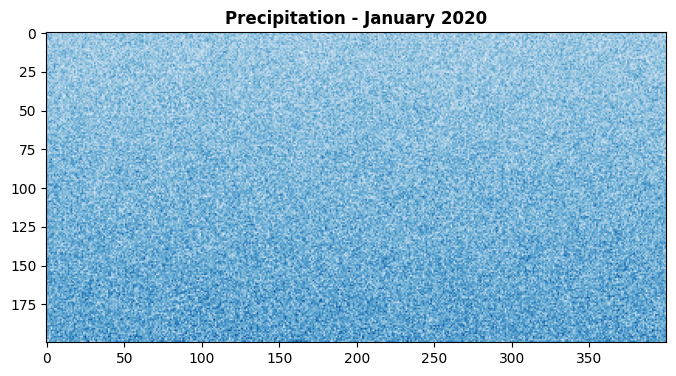

In [18]:
with rasterio.open(raster_path_2020) as src:
    print(src.profile)  # Metadata of raster
    print(f"Number of bands: {src.count}")  # Number of bands (12 for each month)

    # Read one sample band (e.g., January, Band 1)
    band1 = src.read(1)

    # Show raster shape and sample data
    print("Raster shape:", band1.shape)
    print("Raster statistics:", {"min": np.min(band1), "max": np.max(band1), "mean": np.mean(band1)})

    # Plot the first band
    fig, ax = plt.subplots(figsize=(8, 6))
    rasterio.plot.show(band1, ax=ax, cmap="Blues", title="Precipitation - January 2020")
    plt.show()

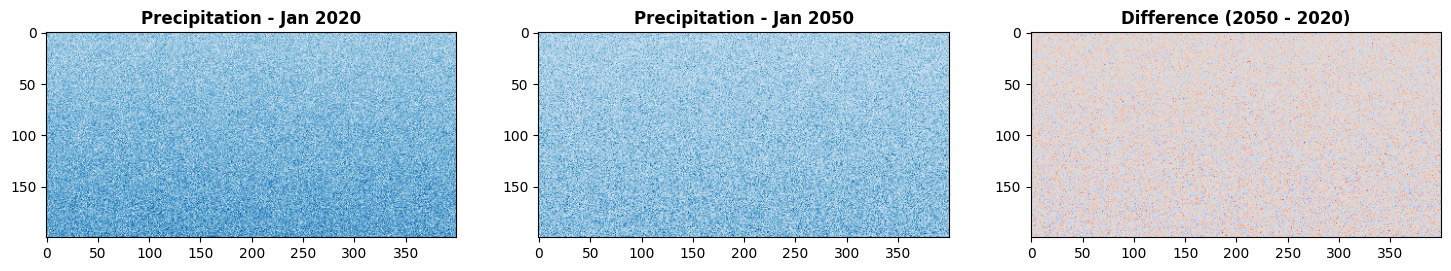

In [19]:
# Load precipitation data for 2020 and 2050 (January)
with rasterio.open(raster_path_2020) as src_2020, \
     rasterio.open(raster_path_2050) as src_2050:

    precip_2020 = src_2020.read(1)  # January 2020
    precip_2050 = src_2050.read(1)  # January 2050

    # Difference between 2050 and 2020
    diff = precip_2050 - precip_2020

    # Plot side by side
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    rasterio.plot.show(precip_2020, ax=axes[0], cmap="Blues", title="Precipitation - Jan 2020")
    rasterio.plot.show(precip_2050, ax=axes[1], cmap="Blues", title="Precipitation - Jan 2050")
    rasterio.plot.show(diff, ax=axes[2], cmap="coolwarm", title="Difference (2050 - 2020)")

    plt.show()

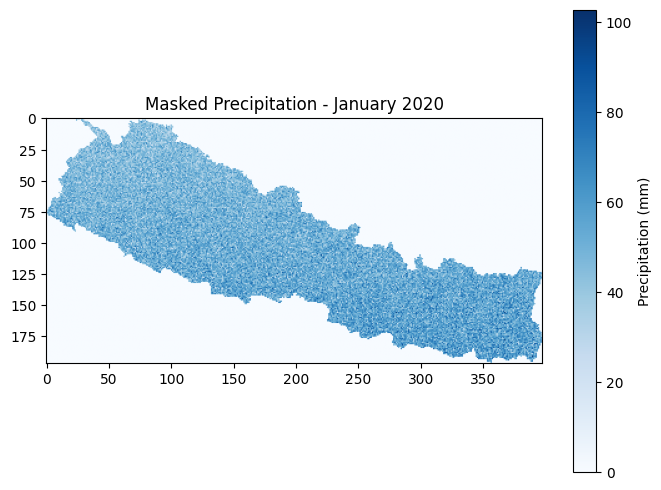

In [30]:
# Mask raster with the vector file (Nepal boundaries)
def mask_raster(raster_path_2020, vector_path):
    with fiona.open(vector_path, "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]

    with rasterio.open(raster_path_2020) as src:
        out_image, out_transform = mask(src, shapes, crop=True)
        return out_image[0]  # Extract the first band

masked_precip_2020 = mask_raster(raster_path_2020, path)

# Plot the masked raster
plt.figure(figsize=(8, 6))
plt.imshow(masked_precip_2020, cmap="Blues")
plt.title("Masked Precipitation - January 2020")
plt.colorbar(label="Precipitation (mm)")
plt.show()


In [24]:
# Extract statistics of raster data
def raster_stats(raster_path_2020):
    with rasterio.open(raster_path_2020) as src:
        data = src.read(1)  # Read first band
        stats = {
            "Min": np.min(data),
            "Max": np.max(data),
            "Mean": np.mean(data),
            "Std Dev": np.std(data)
        }
    return stats

# Compare precipitation in 2020 and 2050
precip_2020_stats = raster_stats("datas/rastar/nepal_climate_data/nepal_precipitation_2020.tif")
precip_2050_stats = raster_stats("datas/rastar/nepal_climate_data/nepal_precipitation_2050.tif")

print("Precipitation Stats (2020):", precip_2020_stats)
print("Precipitation Stats (2050):", precip_2050_stats)


Precipitation Stats (2020): {'Min': 6.8563433623171495, 'Max': 102.83267376645965, 'Mean': 50.83796524449648, 'Std Dev': 11.392472418361306}
Precipitation Stats (2050): {'Min': -6.410086048906941, 'Max': 134.9692970311526, 'Mean': 48.285593218473295, 'Std Dev': 16.390304034131695}


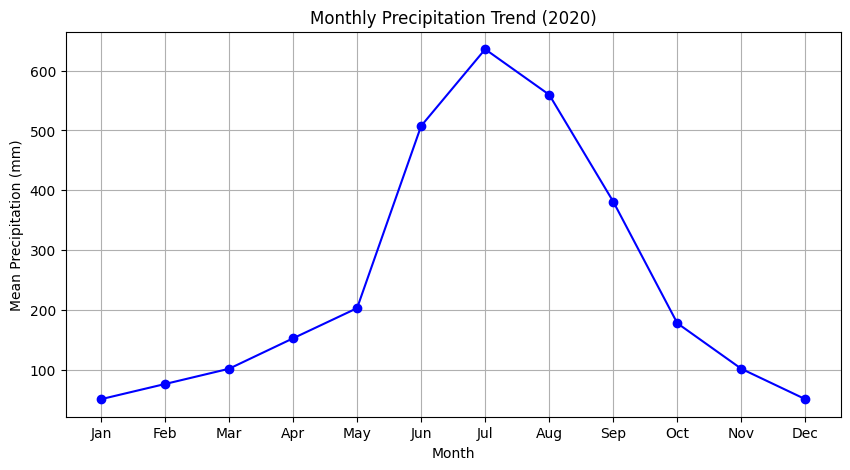

In [26]:
# Load all 12 months of precipitation data for 2020
with rasterio.open("datas/rastar/nepal_climate_data/nepal_precipitation_2020.tif") as src:
    monthly_precip_2020 = [src.read(i) for i in range(1, 13)]  # Load all 12 bands

# Compute monthly mean precipitation
monthly_means = [np.mean(month) for month in monthly_precip_2020]

# Plot temporal trend
plt.figure(figsize=(10, 5))
plt.plot(range(1, 13), monthly_means, marker="o", linestyle="-", color="b")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Mean Precipitation (mm)")
plt.title("Monthly Precipitation Trend (2020)")
plt.grid()
plt.show()


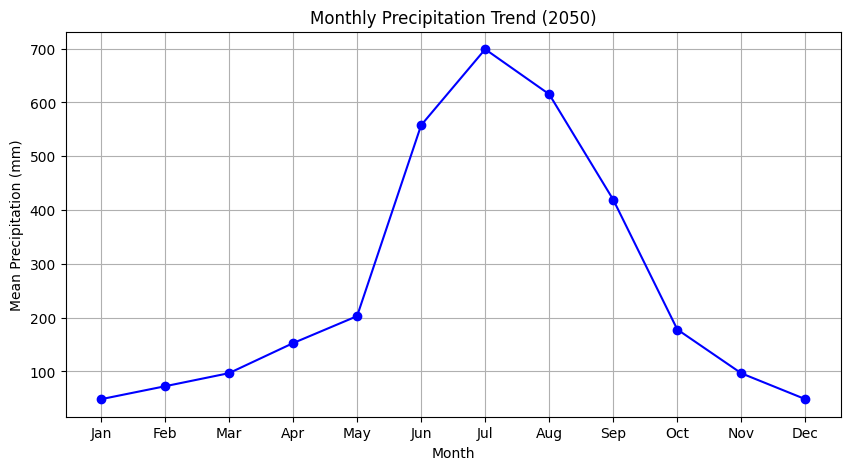

In [29]:
# Load all 12 months of precipitation data for 2050
with rasterio.open("datas/rastar/nepal_climate_data/nepal_precipitation_2050.tif") as src:
    monthly_precip_2050 = [src.read(i) for i in range(1, 13)]  # Load all 12 bands

# Compute monthly mean precipitation
monthly_means = [np.mean(month) for month in monthly_precip_2050]

# Plot temporal trend
plt.figure(figsize=(10, 5))
plt.plot(range(1, 13), monthly_means, marker="o", linestyle="-", color="b")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Mean Precipitation (mm)")
plt.title("Monthly Precipitation Trend (2050)")
plt.grid()
plt.show()
